In [1]:
from fastai2.vision.all import *
import librosa # the librosa library makes it very convenient to work with audio files in Python

In [3]:
path = untar_data(URLs.MACAQUES)

def get_items(path): return get_files(path)

def get_y(path): return path.parent.stem

def get_x(path, rate=24414, num_samples=18310):
    x, rate = librosa.load(path, sr=rate)
    x = librosa.util.fix_length(x, num_samples)
    spec = librosa.feature.melspectrogram(x, sr=rate, n_fft=1024, hop_length=140)
    spec = spec / spec.max() * 255 # we want the range of values for our data to be [0, 255]
                                   # this way fastai internally will be able to represent it as an image using PIL
    return spec.astype(np.uint8)

In [7]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_items,
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(seed=42))

In [8]:
dls = db.dataloaders(path, num_workers=12)

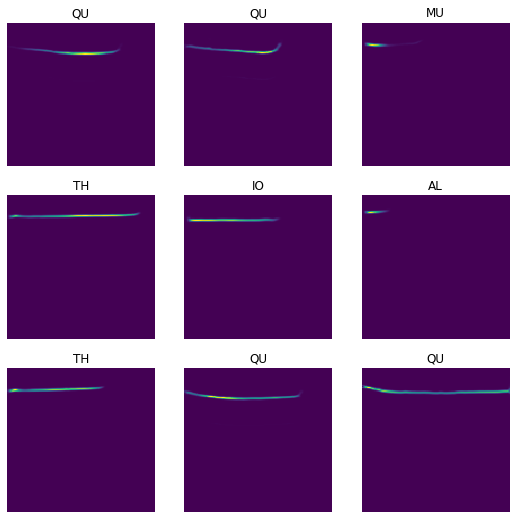

In [9]:
dls.show_batch()

In [10]:
# learn = cnn_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(1)

In [11]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix(figsize=(12,12), dpi=60)